In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv("train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [2]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv("train.csv")


In [6]:
df.shape

(550068, 12)

In [13]:
## removing outliers of main two columns:
## finding outliers:
## 1. in Purchase column
from scipy.stats.mstats import winsorize
arr=df['Purchase'].to_numpy()
Q1=np.quantile(arr, .25) ## lower quartile
Q3=np.quantile(arr, .75) ## upper quartile
IQR=Q3-Q1
print("Highest allowed", Q3+1.5*IQR)
print("Lowest allowed",Q1-1.5*IQR)



Highest allowed 21400.5
Lowest allowed -3523.5


In [14]:
## returning the outliers:
df[(df['Purchase'] <-3523.5) | (df['Purchase'] >21400.5)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,16.0,NaN,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,13.0,NaN,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,15.0,NaN,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,13.0,NaN,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,16.0,NaN,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,13.0,16.0,23663


In [21]:
##new dataframe
new_df=df[(df['Purchase'] > -3523.5) | (df['Purchase'] <21400.5)]
new_df.shape

(550068, 12)

In [15]:
##2. Product_Category_1
arr=df['Product_Category_1'].to_numpy()
Q1=np.quantile(arr, .25) ## lower quartile
Q3=np.quantile(arr, .75) ## upper quartile
IQR=Q3-Q1
print("Highest allowed", Q3+1.5*IQR)
print("Lowest allowed",Q1-1.5*IQR)

Highest allowed 18.5
Lowest allowed -9.5


In [16]:
## returning the outliers:
df[(df['Product_Category_1'] <-9.5) | (df['Product_Category_1'] >18.5)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,NaN,NaN,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,NaN,NaN,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,NaN,NaN,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,NaN,NaN,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,NaN,NaN,241
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [20]:
## new dataframe
new_df=df[(df['Product_Category_1'] > -9.5) | (df['Product_Category_1'] <18.5)]
new_df.shape

(550068, 12)

In [29]:
## to normalize data of Occupation,Product_Category_1 and Purchase comlumn
df2 = df[['Occupation', 'Product_Category_1','Purchase']].copy()
df2

,Occupation,Product_Category_1,Purchase
0,10,3,8370
1,10,1,15200
2,10,12,1422
3,10,12,1057
4,16,8,7969
...,...,...,...
550063,13,20,368
550064,1,20,371
550065,15,20,137
550066,1,20,365


In [30]:
normalized_df=(df2-df2.min())/(df2.max()-df2.min())
normalized_df

,Occupation,Product_Category_1,Purchase
0,0.50,0.105263,0.348992
1,0.50,0.000000,0.634181
2,0.50,0.578947,0.058875
3,0.50,0.578947,0.043634
4,0.80,0.368421,0.332248
...,...,...,...
550063,0.65,1.000000,0.014865
550064,0.05,1.000000,0.014990
550065,0.75,1.000000,0.005219
550066,0.05,1.000000,0.014740


In [31]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray(normalized_df)
data

array([[0.5       , 0.10526316, 0.34899161],
       [0.5       , 0.        , 0.63418097],
       [0.5       , 0.57894737, 0.05887511],
       ...,
       [0.75      , 1.        , 0.00521942],
       [0.05      , 1.        , 0.01473966],
       [0.        , 1.        , 0.01995908]])

In [39]:
scaled = MinMaxScaler().fit_transform(data)
print(scaled)

[[0.5        0.10526316 0.34899161]
 [0.5        0.         0.63418097]
 [0.5        0.57894737 0.05887511]
 ...
 [0.75       1.         0.00521942]
 [0.05       1.         0.01473966]
 [0.         1.         0.01995908]]


In [34]:
## now standardizing the same above data:
standardized_df=((df2-df2.mean())/df2.std())
standardized_df

,Occupation,Product_Category_1,Purchase
0,0.294863,-0.610808,-0.177973
1,0.294863,-1.118911,1.181755
2,0.294863,1.675654,-1.561192
3,0.294863,1.675654,-1.633857
4,1.214733,0.659449,-0.257804
...,...,...,...
550063,0.754798,3.708066,-1.771024
550064,-1.084942,3.708066,-1.770427
550065,1.061422,3.708066,-1.817012
550066,-1.084942,3.708066,-1.771621


In [36]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray(standardized_df)
data

array([[ 0.29486329, -0.61080816, -0.17797274],
       [ 0.29486329, -1.11891095,  1.18175473],
       [ 0.29486329,  1.67565442, -1.56119184],
       ...,
       [ 1.06142166,  3.7080656 , -1.81701172],
       [-1.08494178,  3.7080656 , -1.77162111],
       [-1.23825345,  3.7080656 , -1.74673591]])

In [37]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[ 0.29486356 -0.61080871 -0.1779729 ]
 [ 0.29486356 -1.11891197  1.1817558 ]
 [ 0.29486356  1.67565594 -1.56119326]
 ...
 [ 1.06142262  3.70806897 -1.81701338]
 [-1.08494277  3.70806897 -1.77162273]
 [-1.23825458  3.70806897 -1.7467375 ]]


Text(0, 0.5, 'No. of males and females')

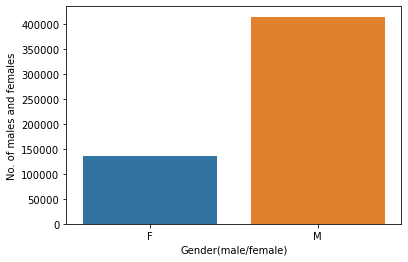

In [40]:
## Visualizing data through graphs:
##1.counting the number of malesand females through countplot
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sb.countplot( x="Gender", data=df)
plt.xlabel("Gender(male/female)")
plt.ylabel("No. of males and females")


In [25]:
## 2. bar plot to get no. of females of different age groups:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv("train.csv")
df2=df.loc[df['Gender'] == "F", 'Age'].value_counts()
lst=list(df2)
var=df['Age'].drop_duplicates()
lst2=list(var)
lst2



['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

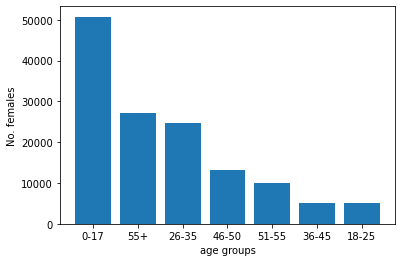

In [28]:
plt.bar(lst2,lst)
plt.xlabel("age groups")
plt.ylabel("No. females")
plt.show()



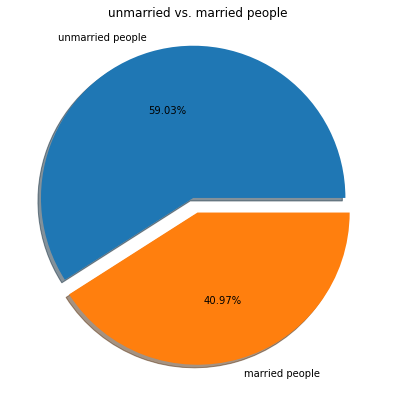

In [57]:
## 3. pie plot to get a view of married vs unmarried people
total=550068
plt.rcParams['figure.figsize'] = [10,7]
non_married = df['Marital_Status'].eq(0).sum()*100/total
married=df['Marital_Status'].eq(1).sum()*100/total
lst3 = [non_married , married]
label = ['unmarried people' , 'married people']
exp= [0.1, 0]
plt.pie(lst3 ,labels = label ,explode = exp, shadow = True , radius = 1, autopct = "%1.2f%%")
plt.title("unmarried vs. married people" , color = "black")
plt.show()


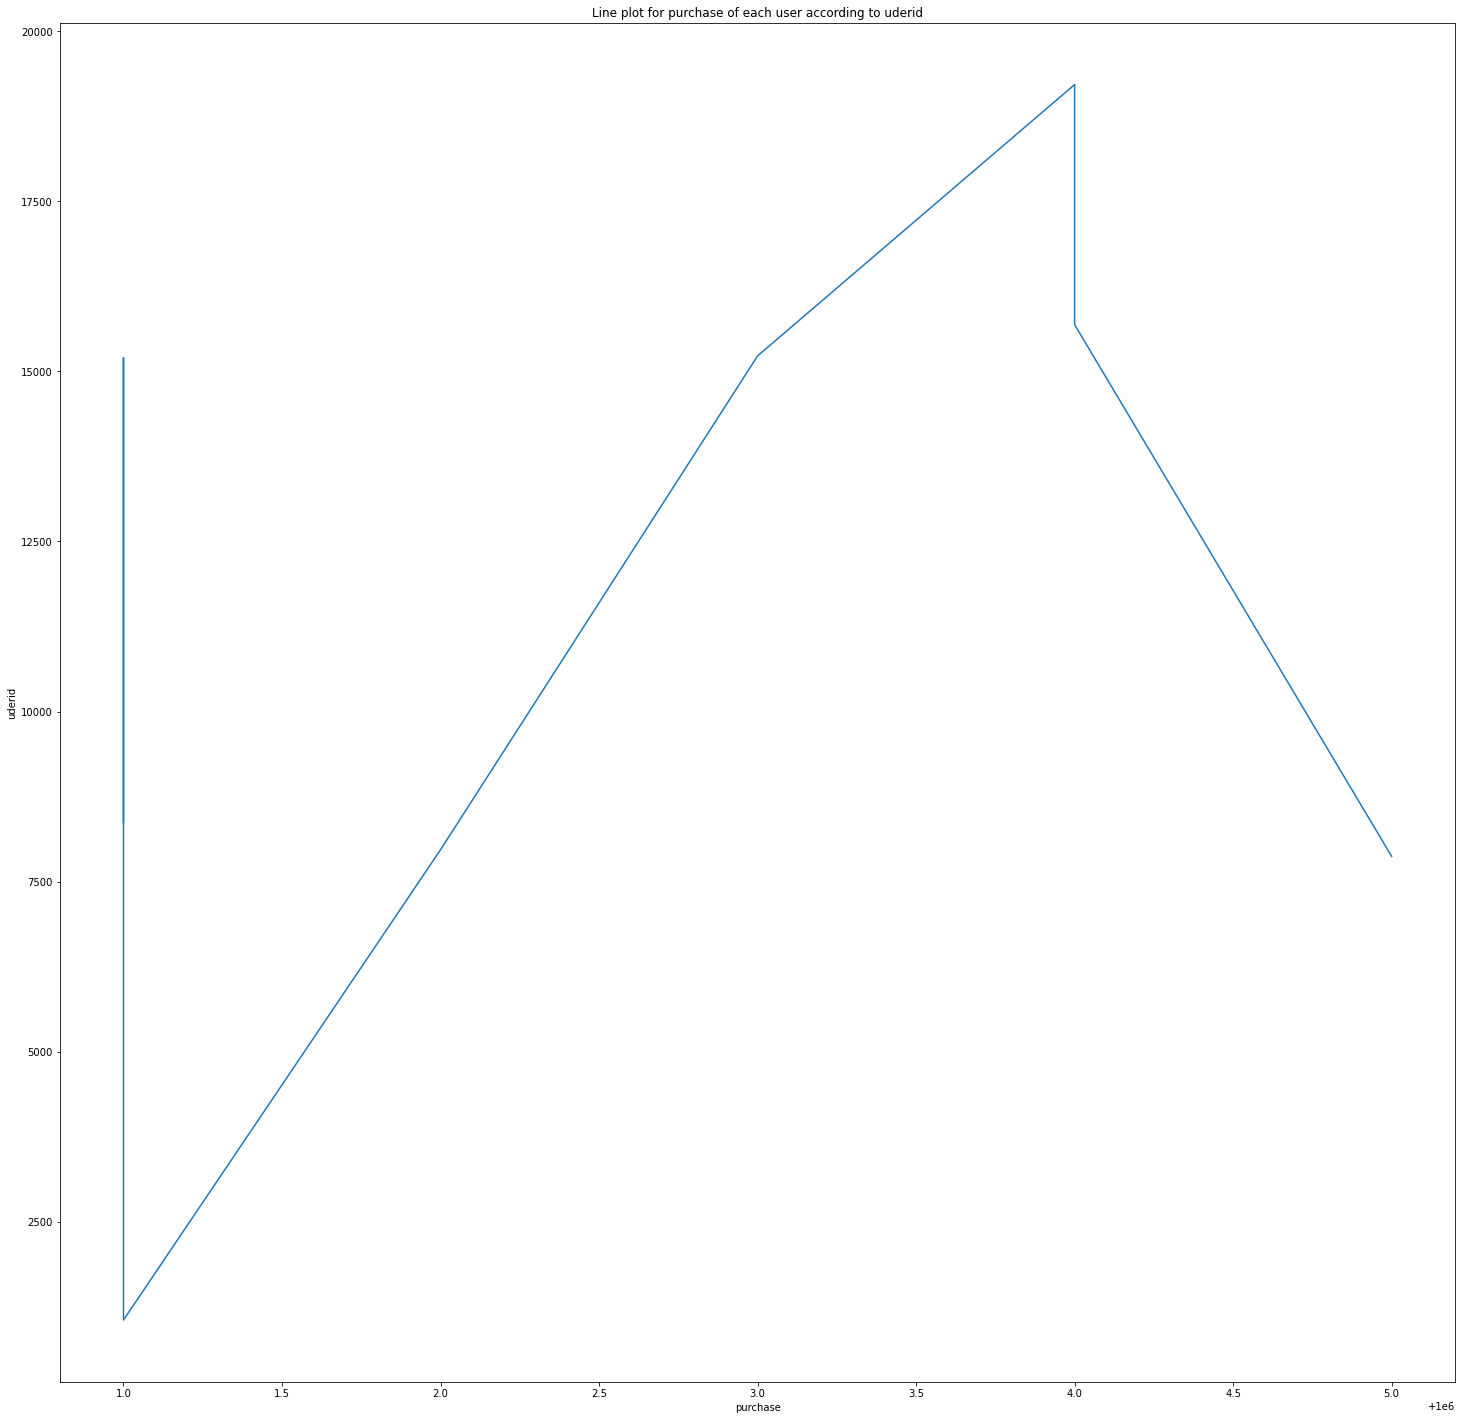

In [59]:
## 4.line plot
userid = list(df.iloc[0:10]['User_ID'])
purchase=list(df.iloc[0:10]['Purchase'])
plt.rcParams['figure.figsize'] = [25,25]
plt.plot(userid,purchase)
plt.title('Line plot for purchase of each user according to uderid')
plt.ylabel('uderid')
plt.xlabel('purchase')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x19d0b05ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x19d0b06d580>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d0b05e9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19d0b06dca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d0b079070>],
 'means': []}

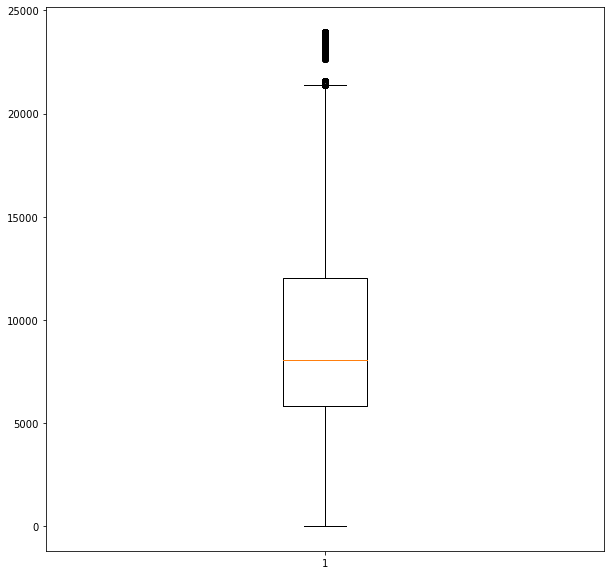

In [61]:
## 5. boxplot
plt.rcParams['figure.figsize'] = [10,10]
plt.boxplot(df["Purchase"])

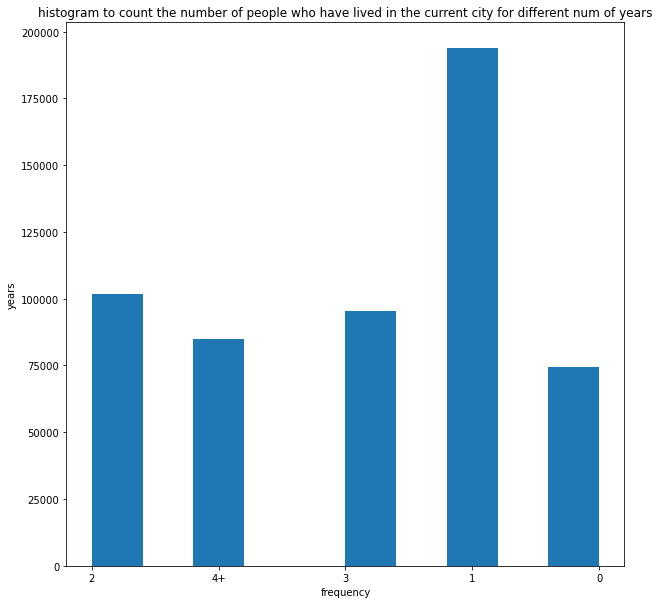

In [72]:
## 6. histogram
plt.hist(df['Stay_In_Current_City_Years'])
plt.title('histogram to count the number of people who have lived in the current city for different num of years')
plt.ylabel('years')
plt.xlabel('frequency')
plt.show()